## [Datacamp Course Link](https://www.datacamp.com/courses/extreme-gradient-boosting-with-xgboost)

# Intro to XGBoost

```python
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

```

### Base Learners
- Individual learning algorithm in an ensemble algorithm
- CART -- Classification and Regression Tree
- each leaf **always** contains a real value score
- can later be converted to categories by thresholding if necessary

```python
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

```

# What is boosting?
- boosting is a concept that can be applied to many machine learning algorithms
- A weak learner is one that is just better than chance
- Boosting learns iteratively from a series of weak learners

- Model evaluation through cross-validation
    - Cross-Validation: Robust method for estimating the performance of a model on unseen data
    - Generates many non-overlapping train/test splits on training data
    - Reports the average test set performance across all data splits
    
## Cross validation in XGBoost example
```python
import xgboost as xgb
import pandas as pd

class_data = pd.read_csv('classification_data.csv')
churn_dmatrix = xgb.DMatrix(data=churn_data.iloc[:,:-1], label=churn_data.month_5_still_here)

parms={"objective":"binary:logistic", "max_depth":4}

cv_results = xgb.cv(dtrain=churn_dmartix, params=params, nfold=4, num_boost_round=10, metrics="error", as_pandas=True)

print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))
```

# Example Two

```python
# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))
```

`cv_results` stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From `cv_results`, the final round `'test-error-mean'` is extracted and converted into an accuracy, where accuracy is `1-error`. The final accuracy of around 75% is an improvement from earlier!

```python
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])
```

An AUC of 0.84 is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.

# When to NOT use XGBoost

- Image regognition
- Computer vision
- Natural language processing and understanding problems
- When the number of training samples is significantly smaller than the number of features

# XGBoost for Regression

## Common regression metrics

- Root mean squared error (RMSE)
    - But it tends to punish large differences between actual and predicted values much more than smaller ones
- Mean absolute error (MAE)

# Objective (loss) functions and base learners

## Objective Functions and Why We Use Them
- Quantifies how far off a prediction is from the actual result
- Measures the difference between estimated and true values for some collection of data
- Goal: Find the model that yields the minimum value of the loss function

- Loss functions names in xgboost:
    - reg:linear - use for regression problems
    - reg:logistic - use for classification problems when you want just decision, not probability
    - binary:logistic - use when you want probability rather than just decision
    
- XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
- Individual models = base learners
- Want base learners that when combined create final prediction that is non-linear
- Each base learner should be good at distinguishing or predicting different parts of the dataset
- Two kinds of base learners: tree and linear

# Trees as Base Learners example: Scikit-learn API

```python
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

boston_data = pd.read_csv("boston_housing.csv")

X, y = boston_data.iloc[:,:-1], boston_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" % (rmse))
```

# Linear Base Learners Example: Learning API Only

```python
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

boston_data = pd.read_csv("boston_housing.csv")

X, y = boston_data.iloc[:,:-1], boston_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# NEW
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)
params = {"booster":"gblinear","objective":"reg:linear"}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)

preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))
```

In [1]:
import pandas as pd
data_set = "ames_housing_trimmed_processed.csv"

ames = pd.read_csv(data_set)

X, y = ames.iloc[:,:-1], ames.iloc[:,-1]

[Installing xgboost on OSX](https://xgboost.readthedocs.io/en/latest/build.html)

`brew install gcc@7`
Then install XGBoost with pip:

`pip3 install xgboost`

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


In [3]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear","objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


In [4]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4, 'silent':1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.531250      429.454591   142980.433594    1193.791602
1    102832.544922      322.469930   104891.394532    1223.158855
2     75872.615235      266.475960    79478.937500    1601.344539
3     57245.652343      273.625086    62411.920899    2220.150028
4     44401.298828      316.423666    51348.279297    2963.377719
4    51348.279297
Name: test-rmse-mean, dtype: float64


In [5]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4, 'silent':1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.482421     668.308109  127634.000000   2404.009898
1    89770.056641     456.965267   90122.501953   2107.912810
2    63580.791016     263.404950   64278.558594   1887.567576
3    45633.155274     151.883420   46819.168945   1459.818607
4    33587.090820      86.999396   35670.646484   1140.607452
4    35670.646484
Name: test-mae-mean, dtype: float64


# Regularization in XGBoost

- Regularization is a control on model complexity
- Want models that are both accurate and as simple as possible
- Regularization parameters in XGBoost:
    - gamma - minimum loss reduction allowed for a split to occur
    - alpha - l1 regularization on leaf weights, larger values mean more regularization
    - lambda - l2 regularization on leaf weights

# Base learners in XGBoost

- Linear Base Learner:
    - Sum of linear terms
    - Boosted model is weighted sum of linear models (thus is itself linear)
    - Rarely used
- Tree Base Learner
    - Decision tree
    - Boosted model is weighted sum of decision trees (nonlinear)
    - Almost exclusively used in XGBoost
    
# Aside -- Creating DataFrames from multiple equal-length lists

- `pd.DataFrame(list(zip(list1, list2)), columns=["list1", "list2"])`
- `zip` creates a `generator` of parallel values:
    - `zip([1,2,3],["a","b","c"])=[1,"a"], [2,"b"],[3,"c"]`
    - `generators` need to be completely instantiated before they can be used in `DataFrame` objects
- `list()` instantiates the full generator and passing that into the `DataFrame` converts the whole expression

In [6]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3, 'silent':1}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357421
1   10  57746.064453
2  100  76624.625000


In [7]:
import matplotlib.pyplot as plt

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2, 'silent':1}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

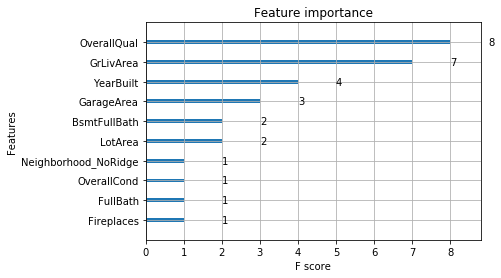

In [8]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2, 'silent':1}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Why tune your model?

## Untuned Model Example:

In [9]:
import pandas as pd
import xgboost as xgb
import numpy as np
housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X, label=y)
untuned_params={"objective":"reg:linear", 'silent':1}
untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=untuned_params, nfold=4, metrics="rmse", as_pandas=True, seed=123)

print("Untuned rmse : %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Untuned rmse : 34624.229980


## Tuned Model Example

In [10]:
import pandas as pd
import xgboost as xgb
import numpy as np
housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X, label=y)
tuned_params={"objective":"reg:linear", 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'silent':1}
tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=4, num_boost_round=200, metrics="rmse", as_pandas=True, seed=123)

print("Tuned rmse : %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Tuned rmse : 29812.683594


Adding `'silent':1` to the params dictionary supressed the output to the console on each cross-validation iteration. [xgboost example Github](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/cross_validation.py)

In [11]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3, 'silent':1}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.299479
1                   10  34774.194010
2                   15  32895.098958


In [12]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4, 'silent':1}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, metrics="rmse", early_stopping_rounds=10, as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141871.630208      403.632626   142640.656250     705.559400
1    103057.036458       73.769561   104907.664063     111.113862
2     75975.966146      253.726099    79262.059895     563.766991
3     57420.529948      521.658354    61620.136719    1087.694282
4     44552.955729      544.170190    50437.562500    1846.448017
5     35763.949219      681.798925    43035.658854    2034.471024
6     29861.464844      769.571318    38600.880208    2169.796232
7     25994.675781      756.521419    36071.817708    2109.795430
8     23306.836588      759.238254    34383.184896    1934.546688
9     21459.770833      745.624404    33509.139974    1887.375633


In [13]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3, "silent":1}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, metrics="rmse", early_stopping_rounds=5, as_pandas=True, seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.406250
1  0.010  179932.182292
2  0.100   79759.411458


In [14]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear", "silent":1}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, metrics="rmse", early_stopping_rounds=5, num_boost_round=10, as_pandas=True, seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.468750
1          5  35596.599610
2         10  36065.546875
3         20  36739.576172


In [15]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3, "silent":1}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  44363.458985
1               0.5  36266.462890
2               0.8  35704.357422
3               1.0  35836.046875


### Awesome! There are several other individual parameters that you can tune, such as `"subsample"`, which dictates the fraction of the training data that is used during any given boosting round. Next up: Grid Search and Random Search to tune XGBoost hyperparameters more efficiently!

# Review of Grid Search and Random Search

## Grid Search: Review
- Search exhaustively over a given set of hyperparameters, once per set of hyperparameters
- Number of models = number of distinct values per hyperparameter multiplied across each hyperparameter
- Pick final model hyperparameter values that give best cross-validated evaluation metric value

Example:

```python
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

gmb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 0.9],
    'n_estimators': [200],
    'subsample': [0.3, 0.5, 0.9]}

gmb = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1)
grid_mse.fit(X, y)

print("Best parameters found: ",grid_mse.best_params_)

print("Lowest RMSE found: "), np.sqrt(np.abs(grid_mse.best_score_))
```

## Random Search: Review
- Create a (possibly infinite) range of hyperparameter values per hyperparameter that you would like to search over
- Set the number of iterations you would like for the random search to continue
- During each iteration, randomly draw a value in the range of specified values for each hyperparameter searched over and train/evaluate a model with those hyperparameters
- After you've reached the maximum number of iterations, select the hyperparameter configuration with the best evaluated score

### Random Search Example:

```python
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

gmb_param_grid = {
    'learning_rate': np.arange(0.05, 1.05, .05),
    'n_estimators': [200],
    'subsample': np.arange(0.05, 1.05, .05)}

gmb = xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=gbm,
                                    param_distributions=gbm_param_grid,
                                    n_iter=25,
                                    scoring='neg_mean_squared_error',
                                    cv=4,
                                    verbose=1)
# this next step and take some time
randomized_mse.fit(X, y)

print("Best parameters found: ",randomized_mse.best_params_)

print("Lowest RMSE found: "), np.sqrt(np.abs(randomized_mse.best_score_))
```

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = grid_mse = GridSearchCV(estimator=gbm,
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  29655.33697347771


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished


In [18]:
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,
                                    param_distributions=gbm_param_grid,
                                    n_iter=5,
                                    scoring='neg_mean_squared_error',
                                    cv=4,
                                    verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  36636.35808132903


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished


# Limits of Grid Search and Random Search

- Grid search required time increases exponentially

- Random search has an exponentially increasing hyperparameter space, and randomly jumping through an arbitrarily large hyperparameter space may, or may not, present a suitable configuration.

# Pipeline Review

- Pipelines are objects that take a list of named 2-tuples as input (name, pipeline_step). A string name as the first input and any scikit-learn compatible transformer or estimator object as the second element.
- Pipeline implements fit/predict methods
- Can be used as input estimator into grid/randomized search and cross_val_score methods. This is where the true power of piplines is realized. The most useful of which is the `cross_val_score` method that allows for efficient cross-validation and out of sample metric calculation and the grid search and random search approaches for hyperparameter tuning that we just worked through.

# Scikit-learn pipeline example

```python
import pandas as pd
from sklearn.ensenble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipline import Pipeline
from sklearn.model_selection import cross_val_score

names = ["crime", "zone", "industry", "charles", "no", "rooms", "age", "distance", "radial", "tax", "pupil", "aam", "lower", "med_price"]

data = pd.read_csv("boston_housing.csv", names=names)

X, y = data.iloc[:, :-1], data.iloc[:, -1]

rf_pipeline = Pipeline[("st_scaler", StandardScaler()), ("rf_model", RandomForestRegressor())]

scores = cross_val_score(rf_pipeline,X,y,scoring="neg_mean_squared_error", cv=10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final RMSE: ", final_avg_rmse)
```

## Preprocessing I: LabelEncoder and OneHotEncoder

- LabelEncoder: Converts a categorical column of strings into integers
- OneHotEncoder: Takes the column of integers and encodes them as dummy variables

**Currently, this process cannot be executed within a pipeline**

## Preprocessing II: DictVectorizer

- Traditionally used in text processing
- Converts lists of feature mappings into vectors
- Need to convert DataFrame into a list of dictionary entries
- Explore the [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)

In [19]:
df = pd.read_csv("ames_unprocessed_data.csv")

In [20]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In [21]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Performing both encoding steps with `DictVectorizer`

In [22]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,3,65.0,8450,5,0,5,7,5,2003,...,1710,1,0,2,1,3,0,548,2,208500
1,20,3,80.0,9600,24,0,2,6,8,1976,...,1262,0,1,2,0,3,1,460,2,181500
2,60,3,68.0,11250,5,0,5,7,5,2001,...,1786,1,0,2,1,3,1,608,2,223500
3,70,3,60.0,9550,6,0,5,7,5,1915,...,1717,1,0,1,0,3,1,642,2,140000
4,60,3,84.0,14260,15,0,5,8,5,2000,...,2198,1,0,2,1,4,1,836,2,250000


In [26]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)

Pipeline(memory=None,
     steps=[('ohe_onestep', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_ch...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [29]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  30343.486551766466


In [34]:
columns = ['age',
           'bp',
           'sg','al','su','rbc','pc','pcc',
           'ba','bgr','bu','sc','sod','pot',
           'hemo','pcv','wc','rc','htn','dm',
           'cad','appet','pe','ane','class']

df = pd.read_csv("chronic_kidney_disease.csv", names=columns)

X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [40]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [(numeric_feature, strategy="median") for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = CategoricalImputer(
                                                [(category_feature, strategy="ffill") for category_feature in categorical_columns])

SyntaxError: invalid syntax (<ipython-input-40-f95a0341a9b6>, line 20)

In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

In [ ]:
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, 
                                        param_distributions=gbm_param_grid, 
                                        n_iter=2, 
                                        scoring="roc_auc", 
                                        verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

# What we have not covered
- Using XGBoost for ranking/recommendation problems (Netfilx/Amazon problem). Achieved through modifying the loss function in specific ways.
- Using more sophisticated hyperparameter tuning strategies for tuning XGBoost models (Bayesian Optimization)
- Using XGBoost as part of an ensemble of other models for regression/classification